In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os


np.random.seed(42)


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   target  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [5]:
iris.describe()

,SL,SW,PL,PW,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
corr_matrix = iris.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
PW        0.956464
PL        0.949043
SL        0.782561
SW       -0.419446
Name: target, dtype: float64

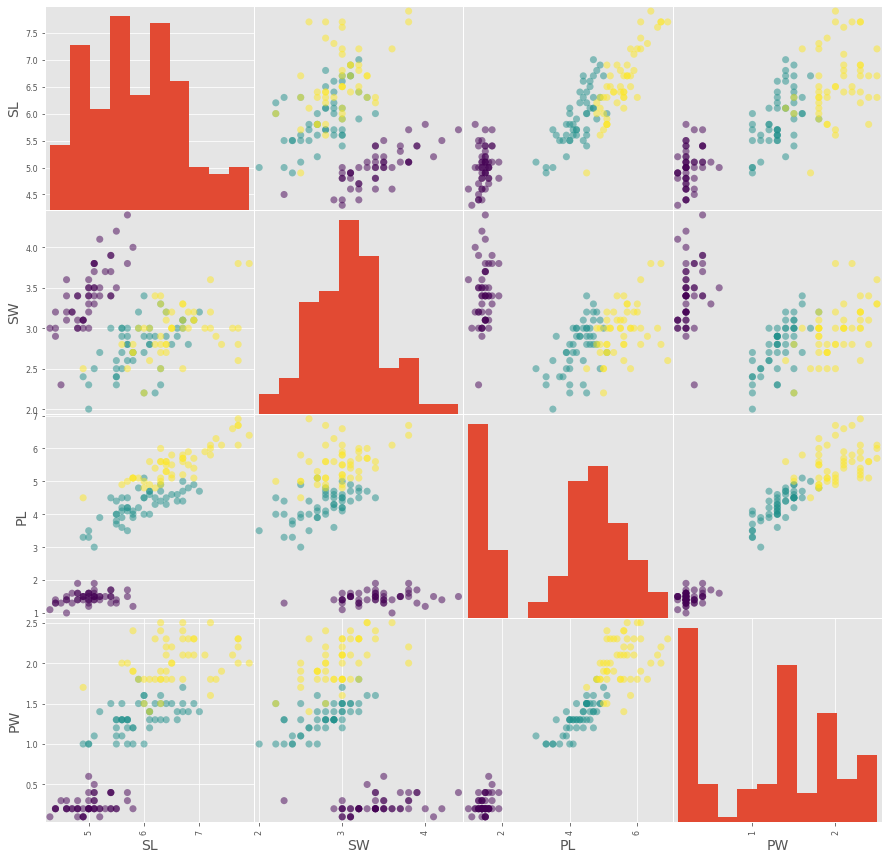

In [7]:
from pandas.plotting import scatter_matrix

data = iris.iloc[:, :4]
species = iris.iloc[:, 4]

scatter_matrix(data, c = species, figsize=[15, 15],
               s=50, marker='o');

In [8]:
X = iris.iloc[:, [2,3]].values 
y = (iris.iloc[:, 4]).astype(np.int)

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [10]:
tree_clf.predict([[1.2,2.5]])

array([0])

In [11]:
tree_clf.predict_proba([[1.2,2.5]])

array([[1., 0., 0.]])

In [12]:
y_pred = tree_clf.predict(X)

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy after CV :", accuracy_score(y, y_pred))
print("Precision after CV:", precision_score(y, y_pred,average='weighted'))
print("Recall after CV   :", recall_score(y, y_pred,average='weighted'))
print("f1_score after CV :", f1_score(y, y_pred,average='weighted'))

Accuracy after CV : 0.96
Precision after CV: 0.9618894256575417
Recall after CV   : 0.96
f1_score after CV : 0.9599358974358975


In [15]:
from sklearn.metrics import classification_report

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

